<a href="https://colab.research.google.com/github/dronesquare-organization/object-detection/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모델 학습하기

- colab에서 **train.py**로 학습 후 pt 파일로 저장된 모델을 다운로드하면 됩니다.

---

### train.py 전체 매개변수 목록

- --weights: 모델 학습에 사용할 초기 가중치 파일의 경로입니다. 기본값은 빈 문자열입니다.  
- --cfg: 모델 구성을 정의한 model.yaml 파일의 경로입니다. 기본값은 'yolo.yaml'입니다.    
- --data: 데이터셋 구성을 정의한 dataset.yaml 파일의 경로입니다. 기본값은 ROOT / 'data/coco128.yaml'입니다.
- --hyp: 학습에 사용될 하이퍼파라미터를 정의한 파일의 경로입니다. 기본값은 ROOT / 'data/hyps/hyp.scratch-low.yaml'입니다.
- --epochs: 총 학습 에포크 수입니다. 기본값은 100입니다.
- --batch-size: 모든 GPU에 대한 총 배치 크기입니다. -1로 설정하면 autobatch가 활성화됩니다. 기본값은 16입니다.
- --imgsz, --img, --img-size: 학습 및 검증에 사용될 이미지 크기(픽셀 단위)입니다. 기본값은 640입니다.
- --rect: 사각형 학습을 활성화합니다.
- --resume: 최근 학습을 이어서 진행할지 여부를 결정합니다. 기본값은 False입니다.
- --nosave: 최종 체크포인트만 저장합니다.
- --noval: 마지막 에포크에서만 검증을 수행합니다.
- --noautoanchor: AutoAnchor를 비활성화합니다.
- --noplots: 플롯 파일을 저장하지 않습니다.
- --evolve: 지정된 세대 수에 걸쳐 하이퍼파라미터를 진화시킵니다. 기본값은 300입니다.
- --bucket: gsutil 버킷의 경로입니다.
- --cache: 이미지 캐시 방식을 설정합니다. 'ram' 또는 'disk'로 설정할 수 있습니다.
- --image-weights: 학습 시 가중치가 부여된 이미지 선택을 사용합니다.
- --device: 사용할 CUDA 장치를 지정합니다. 예: 0 또는 0,1,2,3 또는 cpu. 기본값은 빈 문자열입니다.
- --multi-scale: 이미지 크기를 ±50% 변동시킵니다.
- --single-cls: 다중 클래스 데이터를 단일 클래스로 학습합니다.
- --optimizer: 사용할 최적화 알고리즘입니다. SGD, Adam, AdamW, LION 중에서 선택할 수 있습니다. 기본값은 SGD입니다.
- --sync-bn: SyncBatchNorm을 사용합니다. DDP 모드에서만 사용 가능합니다.
- --workers: 데이터 로더 작업자의 최대 수입니다. DDP 모드에서 각 RANK당 설정됩니다. 기본값은 8입니다.
- --project: 학습 결과를 저장할 프로젝트의 경로입니다. 기본값은 ROOT / 'runs/train'입니다.
- --name: 프로젝트 내에서 학습 결과를 저장할 이름입니다. 기본값은 'exp'입니다.
- --exist-ok: 기존 프로젝트/이름이 있어도 괜찮음을 나타냅니다. 새로운 이름으로 자동 증가하지 않습니다.
- --quad: 쿼드 데이터 로더를 사용합니다.
- --cos-lr: 코사인 학습률 스케줄러를 사용합니다.
- --flat-cos-lr: 평평한 코사인 학습률 스케줄러를 사용합니다.
- --fixed-lr: 고정 학습률 스케줄러를 사용합니다.
- --label-smoothing: 레이블 스무딩 엡실론 값을 설정합니다. 기본값은 0.0입니다.
- --patience: EarlyStopping의 인내심(개선 없는 에포크 수)을 설정합니다. 기본값은 100입니다.
- --freeze: 특정 레이어를 고정합니다. 예: backbone=10, first3=0 1 2. 기본값은 [0]입니다.
- --save-period: 지정된 에포크마다 체크포인트를 저장합니다. 1보다 작으면 비활성화됩니다. 기본값은 -1입니다.
- --seed: 전역 학습 시드입니다. 기본값은 0입니다.
- --local_rank: 자동 DDP 멀티-GPU 인자입니다. 수정하지 마십시오. 기본값은 -1입니다.
- --min-items: 실험적인 설정입니다.
- --close-mosaic: 실험적인 설정입니다.
Logger 인자:

- --entity: 엔터티를 설정합니다.
- --upload_dataset: 데이터셋을 업로드합니다. "val" 옵션이 가능합니다.
- --bbox_interval: 바운딩 박스 이미지 로깅 간격을 설정합니다. 기본값은 -1입니다.
- --artifact_alias: 사용할 데이터셋 아티팩트의 버전을 설정합니다. 기본값은 'latest'입니다.

### 주요 매개변수

- --batch: 코랩 환경에서는 16에서 32사이가 적당함
- --epochs: 25가 적당하나 100까지도 가능함
- --img 640: 사용할 정사각형 이미지 크기를 지정
- --device 0: CUDA 환경이면 0으로 지정
- --data: YOLO 포멧으로 저장된 데이터를 가르키는 yaml 파일 지정
- --weights: 원하는 가중치 .pt 파일을 https://github.com/WongKinYiu/yolov9/releases 여기에서 다운로드 한 뒤 지정
- --cfg yolov9/models/detect 경로에서 weights에 해당하는 yaml 파일 지정
- --hyp yolov9/data/hyps/hyp.scratch-high.yaml 파일 지정

### 1. 레포지토리 클론

In [1]:
!git clone https://github.com/dronesquare-organization/object-detection.git

Cloning into 'object-detection'...
remote: Enumerating objects: 2972, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 2972 (delta 44), reused 140 (delta 40), pack-reused 2825
Receiving objects: 100% (2972/2972), 114.90 MiB | 26.61 MiB/s, done.
Resolving deltas: 100% (51/51), done.
Updating files: 100% (2927/2927), done.
Filtering content: 100% (4/4), 392.99 MiB | 11.59 MiB/s, done.


### train.py 실행

In [3]:
!python /content/object-detection/yolov9/train.py \
--batch 16 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/object-detection/data/roboflow/data.yaml \
--weights /content/object-detection/weights/gelan-c.pt \
--cfg /content/object-detection/yolov9/models/detect/gelan-c.yaml \
--hyp /content/object-detection/yolov9/data/hyps/hyp.scratch-high.yaml

2024-04-03 01:46:35.779519: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 01:46:35.779577: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 01:46:35.780907: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-03 01:46:37.039287: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/object-detection/weights/gelan-c.pt, cfg=/content/object-detection/yolov9/models/detect/gelan-c.yaml, data=/content/object-detection/data/roboflow/data.yaml, hyp=/content/object-detection/yolov9/data/hyps/hyp.scratch-

### 결과 확인 후 모델 저장

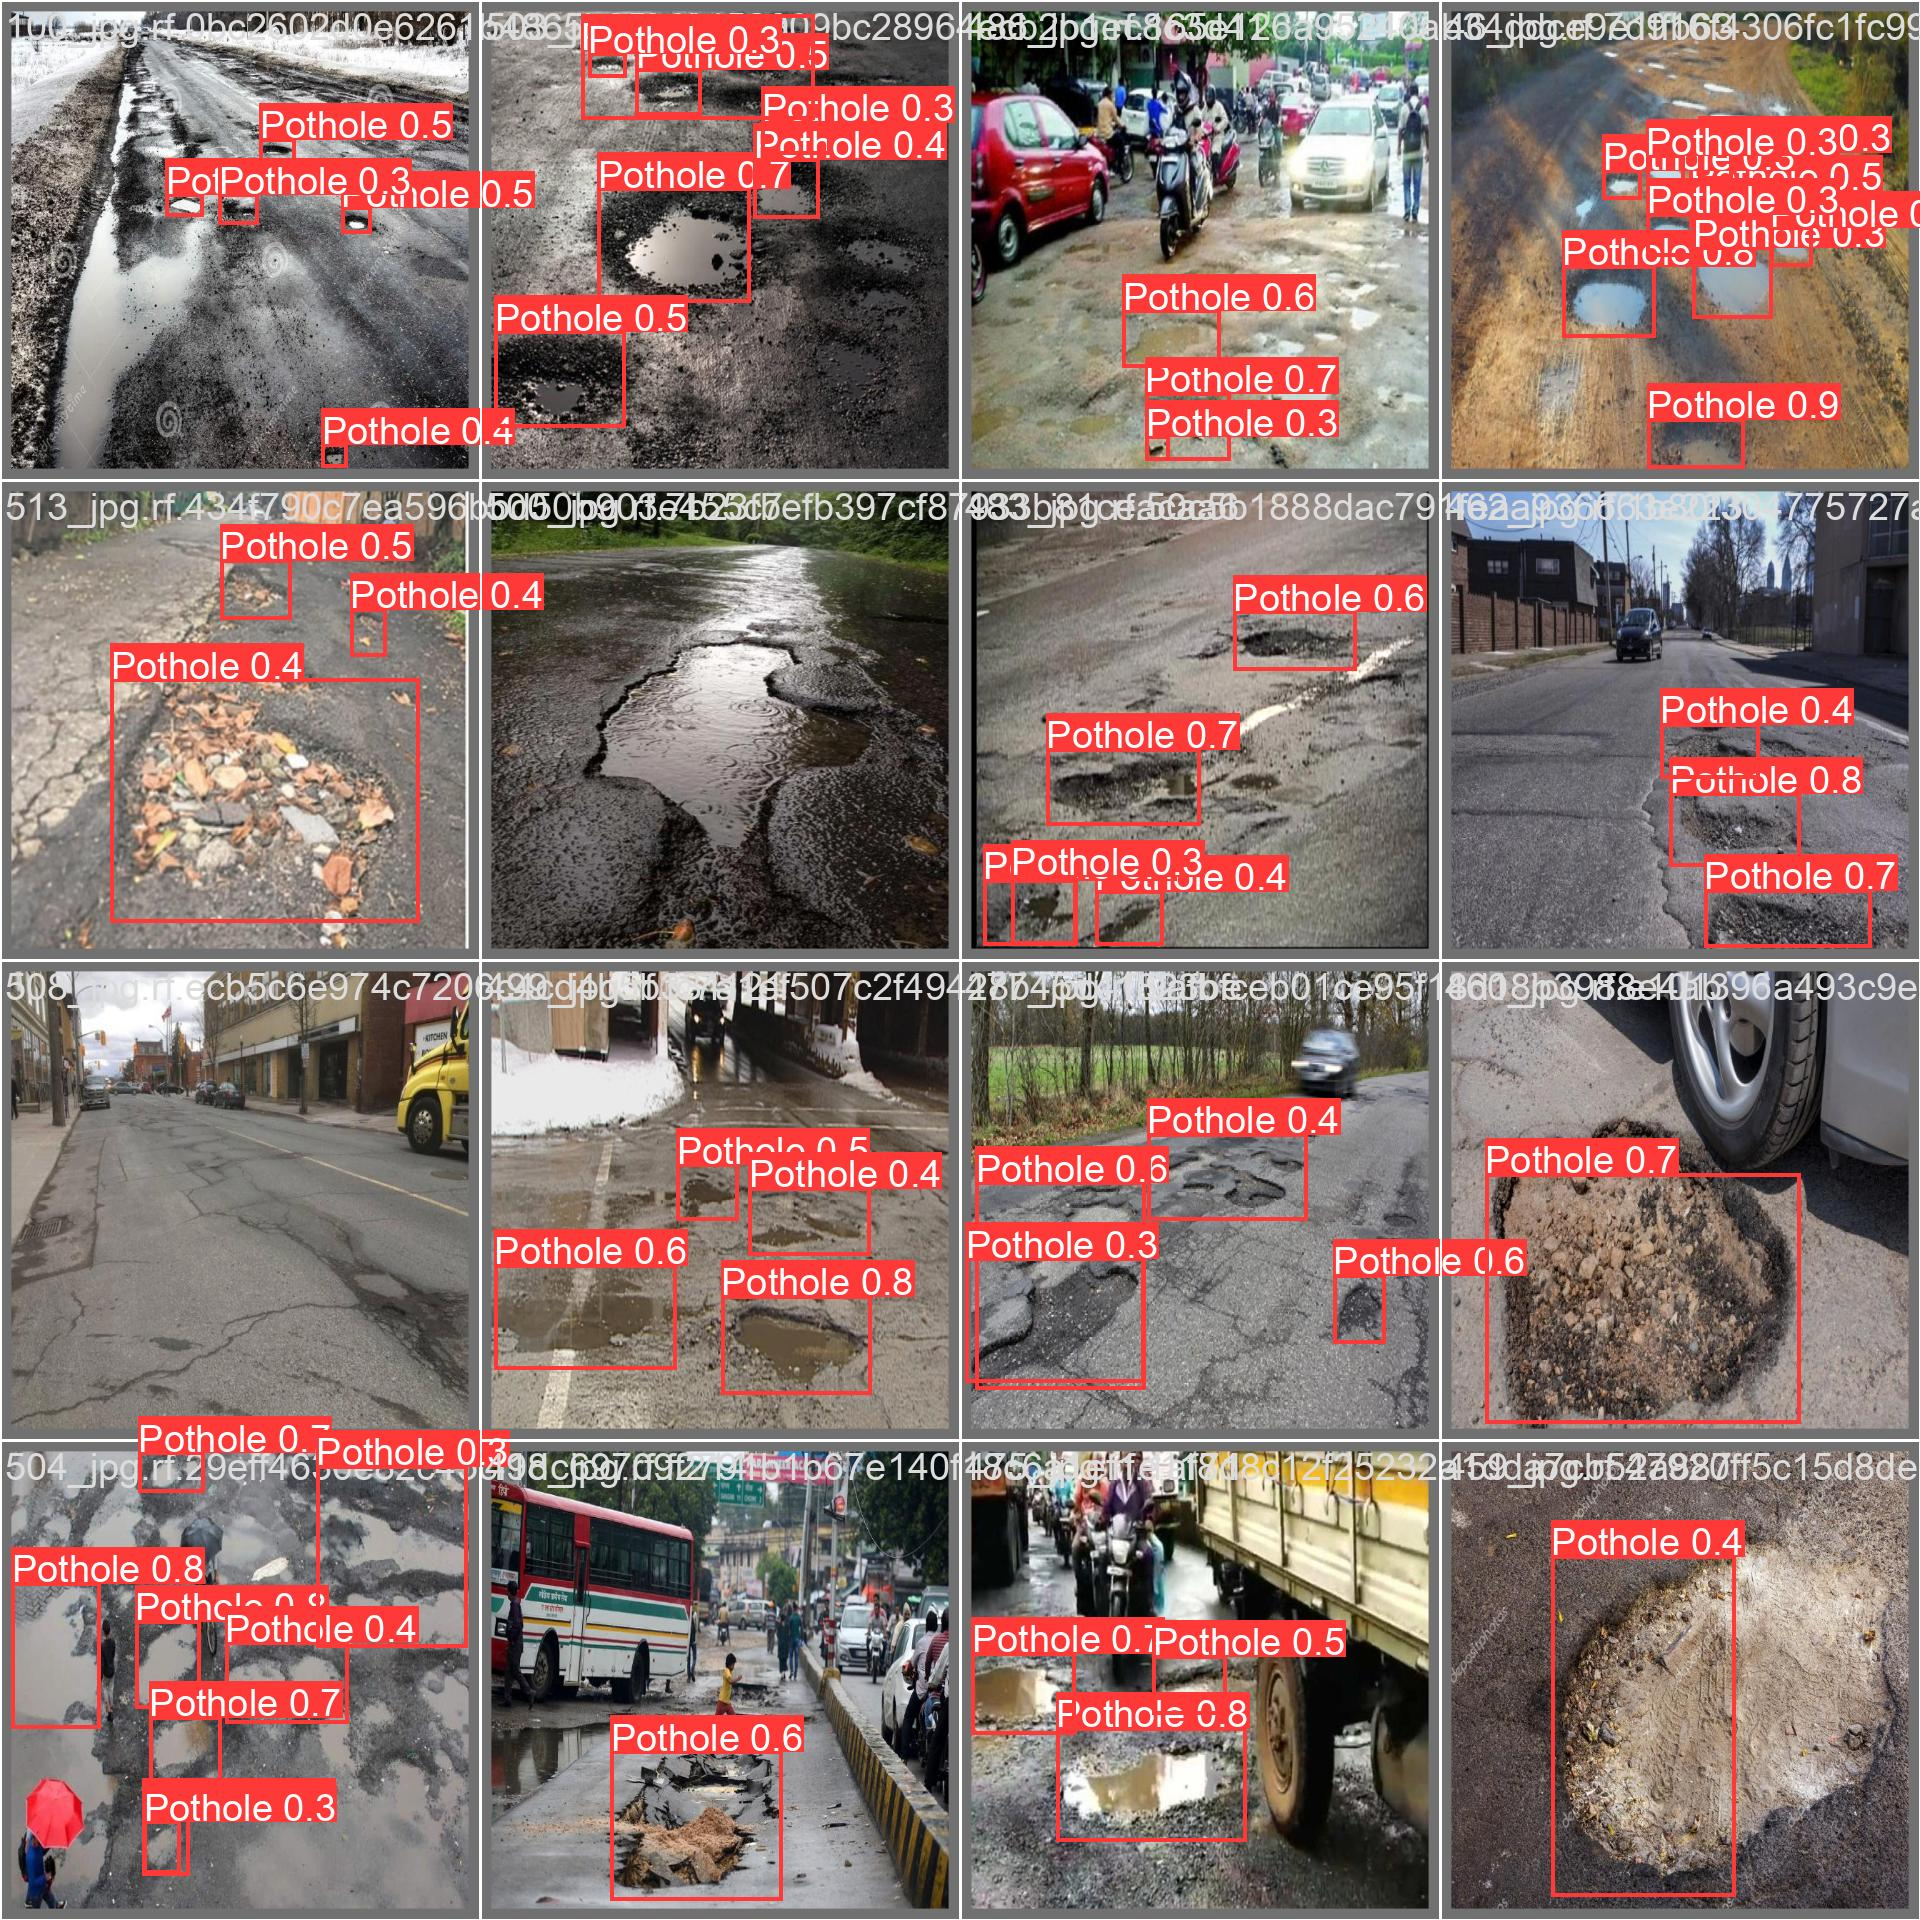

In [3]:
from IPython.display import Image

Image(filename="/content/object-detection/yolov9/runs/train/exp/val_batch0_pred.jpg", width=900)

모델은 yolov9/runs/train/exp/weights/best.pt 경로에 생성되므로 해당 파일을 저장하면 됩니다.
